In [1]:
import os
from pathlib import Path
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
p = Path("dataset/")

dirs = p.glob("*")

labels_dict = {}
image_data = []
labels = []
index = 0

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    labels_dict[index] = label
    
    cnt = 0
    print(folder_dir)
    
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(224,224))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        cnt += 1
    
    print(cnt)
    for i in range(cnt):
        labels.append(index)
        
    index += 1

dataset\Abra
41
dataset\Aerodactyl
97
dataset\Alakazam
48
dataset\Arbok
63
dataset\Arcanine
61
dataset\Articuno
56
dataset\Beedrill
53
dataset\Bellsprout
55
dataset\Blastoise
61
dataset\Bulbasaur
176
dataset\Butterfree
66
dataset\Caterpie
49
dataset\Chansey
57
dataset\Charizard
52
dataset\Charmander
200
dataset\Charmeleon
65
dataset\Clefable
49
dataset\Clefairy
59
dataset\Cloyster
59
dataset\Cubone
58
dataset\Dewgong
66
dataset\Diglett
51
dataset\Ditto
48
dataset\Dodrio
65
dataset\Doduo
48
dataset\Dragonair
65
dataset\Dragonite
62
dataset\Dratini
107
dataset\Drowzee
60
dataset\Dugtrio
64
dataset\Eevee
41
dataset\Ekans
51
dataset\Electabuzz
53
dataset\Electrode
67
dataset\Exeggcute
57
dataset\Exeggutor
67
dataset\Farfetchd
64
dataset\Fearow
122
dataset\Flareon
59
dataset\Gastly
50
dataset\Gengar
60
dataset\Geodude
56
dataset\Gloom
58
dataset\Golbat
67
dataset\Goldeen
58
dataset\Golduck
60
dataset\Golem
64
dataset\Graveler
57
dataset\Grimer
64
dataset\Growlithe
68
dataset\Gyarados
67
dat

In [3]:
print(len(image_data))
print(len(labels))

10120
10120


In [4]:
print(labels_dict.values())

dict_values(['Abra', 'Aerodactyl', 'Alakazam', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Nidoqueen'

In [5]:
import numpy as np

In [6]:
X = np.array(image_data)/float(255.0)
Y = np.array(labels)

print(X.shape)
print(Y.shape)

(10120, 224, 224, 3)
(10120,)


In [7]:
def drawImg(image,label):
    plt.imshow(image.reshape(224,224,3))
    plt.axis("off")
    plt.title(labels_dict[label])
    plt.show()

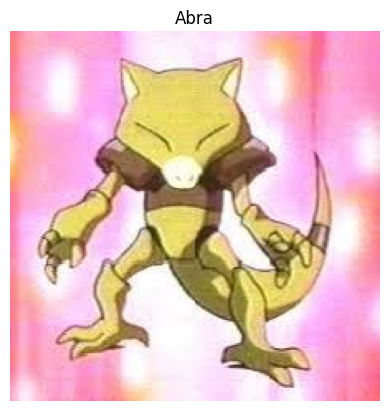

In [8]:
drawImg(X[0],Y[0])

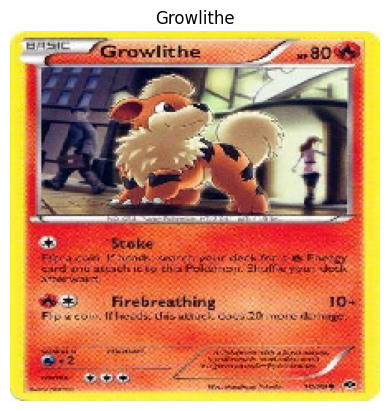

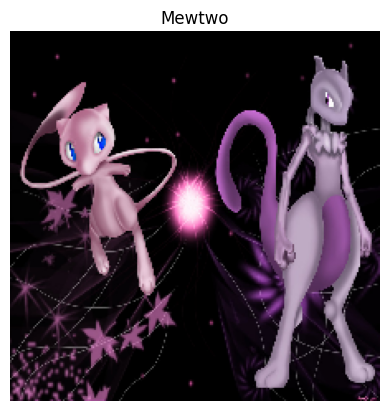

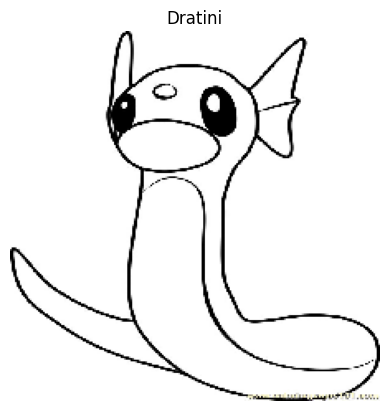

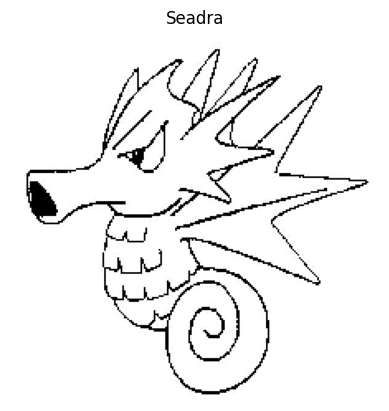

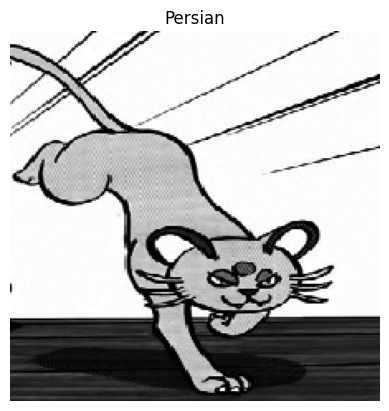

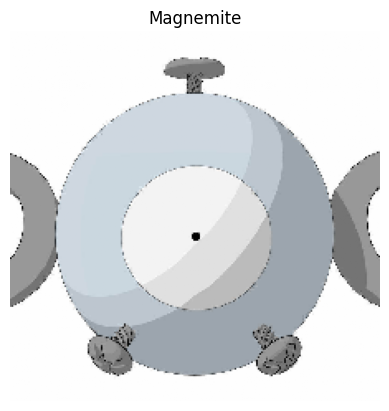

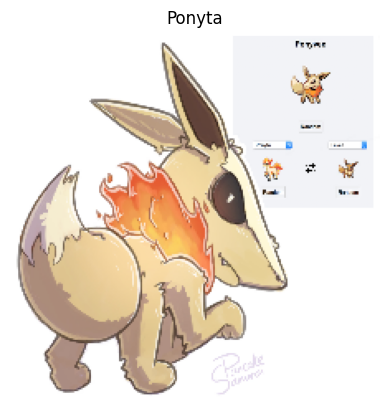

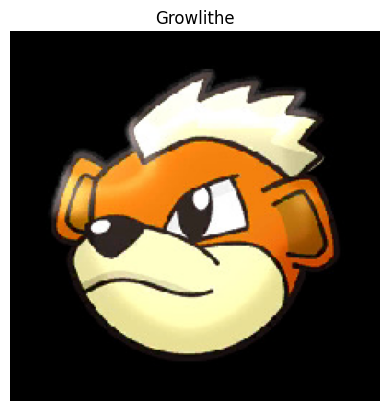

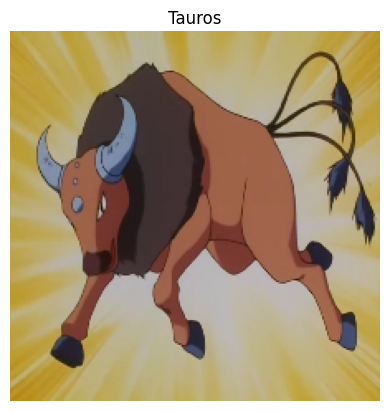

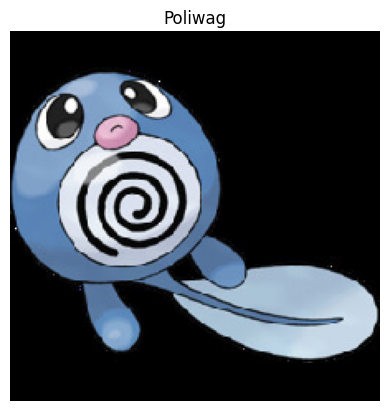

In [9]:
for i in range(10):
    r = np.random.randint(10000)
    drawImg(X[r],Y[r])

In [10]:
import random

combined = list(zip(X,Y))
random.shuffle(combined)

# Unzip
X[:],Y[:] = zip(*combined)

In [11]:
print(Y)

[143 112 101 ...  37  77 109]


In [12]:
from keras.applications import MobileNet
from keras.optimizers import adam_v2
from keras.layers import *
from keras.models import Model
import matplotlib.pyplot as plt

In [13]:
np.unique(Y)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148])

In [14]:
model = MobileNet(input_shape=(224,224,3),include_top = False,weights = 'imagenet')

In [15]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [16]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(1024,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(512,activation='relu')(d1)
d2 = Dropout(0.5)(fc2)
fc3 = Dense(149,activation='softmax')(av1)

model_new = Model(inputs=model.input,outputs=fc3)
model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [17]:
for ix in range(len(model_new.layers)):
    print(ix,model_new.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x000001669EE21580>
1 <keras.layers.convolutional.conv2d.Conv2D object at 0x000001669EE2B670>
2 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001669EE2B9A0>
3 <keras.layers.activation.relu.ReLU object at 0x000001669EE2BDC0>
4 <keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x000001669F1458E0>
5 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001669F145CA0>
6 <keras.layers.activation.relu.ReLU object at 0x000001669F145D00>
7 <keras.layers.convolutional.conv2d.Conv2D object at 0x000001669F16CBE0>
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000016848CC6EE0>
9 <keras.layers.activation.relu.ReLU object at 0x0000016848CC6550>
10 <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x0000016848CCFAF0>
11 <keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x0000016848CD5D30>
12 <keras.la

In [18]:
for ix in range(80):
    model_new.layers[ix].trainable = False

In [19]:
adam = adam_v2.Adam(learning_rate = 0.00003)
model_new.compile(loss = 'categorical_crossentropy',optimizer = adam,metrics = ["accuracy"])

In [20]:
model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [21]:
from keras.utils import np_utils
Y = np_utils.to_categorical(Y)
print(Y.shape)

(10120, 149)


In [22]:
print(Y[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0.]


In [23]:
print(X.shape,Y.shape)

(10120, 224, 224, 3) (10120, 149)


In [24]:
print(model_new)

In [25]:
hist = model_new.fit(X,Y,batch_size = 32,epochs = 10,steps_per_epoch=316)

Epoch 1/10
316/316 [==============================] - 141s 442ms/step - loss: 5.3159 - accuracy: 0.0224
Epoch 2/10
316/316 [==============================] - 138s 438ms/step - loss: 4.7509 - accuracy: 0.0759
Epoch 3/10
316/316 [==============================] - 143s 452ms/step - loss: 4.4105 - accuracy: 0.1404
Epoch 4/10
316/316 [==============================] - 140s 442ms/step - loss: 4.1503 - accuracy: 0.1895
Epoch 5/10
316/316 [==============================] - 143s 454ms/step - loss: 3.9480 - accuracy: 0.2296
Epoch 6/10
316/316 [==============================] - 144s 454ms/step - loss: 3.7741 - accuracy: 0.2671
Epoch 7/10
316/316 [==============================] - 152s 482ms/step - loss: 3.6300 - accuracy: 0.2989
Epoch 8/10
316/316 [==============================] - 147s 466ms/step - loss: 3.5055 - accuracy: 0.3199
Epoch 9/10
316/316 [==============================] - 185s 587ms/step - loss: 3.3854 - accuracy: 0.3428
Epoch 10/10
316/316 [==============================] - 149s 470m